## Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

### Load required libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
transaction = pd.read_excel('QVI_transaction_data.xlsx')

### Examining transaction data

In [4]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**There are no nulls in any of the columns.**

**We can see that the date column is in an integer format. Let's change this to a date format.**

In [6]:
# transaction['DATE']= pd.to_datetime(transaction['DATE'], format="%Y%m%d")
# CSV and Excel integer dates begin on 30 Dec 1899

In [7]:
transaction['DATE']= pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')

In [8]:
print(transaction['DATE'].dtype)

datetime64[ns]


In [9]:
transaction['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

**We should check that we are looking at the right products by examining PROD_NAME. Generate a summary of the PROD_NAME column.**

In [10]:
# products = transaction['PROD_NAME'].unique()
# products_series = pd.Series(products)
products = transaction['PROD_NAME'].value_counts().reset_index()
products

,PROD_NAME,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


In [11]:
with pd.option_context('display.max_rows', None):
    print(products)

                                    PROD_NAME  count
0      Kettle Mozzarella   Basil & Pesto 175g   3304
1    Kettle Tortilla ChpsHny&Jlpno Chili 150g   3296
2    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g   3269
3      Tyrrells Crisps     Ched & Chives 165g   3268
4              Cobs Popd Sea Salt  Chips 110g   3265
5                Kettle 135g Swt Pot Sea Salt   3257
6               Tostitos Splash Of  Lime 175g   3252
7    Infuzions Thai SweetChili PotatoMix 110g   3242
8      Smiths Crnkle Chip  Orgnl Big Bag 380g   3233
9        Thins Potato Chips  Hot & Spicy 175g   3229
10   Kettle Sensations   Camembert & Fig 150g   3219
11    Doritos Corn Chips  Cheese Supreme 170g   3217
12                   Pringles Barbeque   134g   3210
13    Doritos Corn Chip Mexican Jalapeno 150g   3204
14    Kettle Sweet Chilli And Sour Cream 175g   3200
15   Smiths Crinkle Chips Salt & Vinegar 330g   3197
16             Thins Chips Light&  Tangy 175g   3188
17           Dorito Corn Chp     Supreme 380g 

**Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips.**

In [12]:
product_words = products['PROD_NAME'].str.split().explode()
product_words

0          Kettle
0      Mozzarella
0           Basil
0               &
0           Pesto
          ...    
113            WW
113       Crinkle
113           Cut
113      Original
113          175g
Name: PROD_NAME, Length: 589, dtype: object

**As we are only interested in words that will tell us if the product is chips or not, let's remove all words with digits and special characters such as "&".**

In [13]:
# Remove digits, and special characters, and then sort the distinct words by frequency of occurrence.
clean_words = product_words[product_words.str.contains('^[a-zA-Z]+$', regex=True)]
clean_words.value_counts()

PROD_NAME
Chips       21
Smiths      16
Crinkle     14
Cut         14
Kettle      13
            ..
Infzns       1
Chipotle     1
Smoked       1
Crm          1
Fries        1
Name: count, Length: 168, dtype: int64

In [14]:
with pd.option_context('display.max_rows', None):
    print(clean_words.value_counts())

PROD_NAME
Chips              21
Smiths             16
Crinkle            14
Cut                14
Kettle             13
Cheese             12
Salt               12
Original           10
Chip                9
Doritos             9
Salsa               9
RRD                 8
Pringles            8
Corn                8
WW                  7
Chicken             7
Sea                 6
Sour                6
Thinly              5
Crisps              5
Vinegar             5
Chilli              5
Thins               5
Rock                4
Red                 4
Deli                4
Infuzions           4
Supreme             4
Cream               4
Natural             4
Soy                 3
Sensations          3
Twisties            3
Sweet               3
Old                 3
Tostitos            3
CCs                 3
El                  3
Paso                3
Dip                 3
Lime                3
Tomato              3
Tortilla            3
Cobs                3
Woolworths          3


**Remove salsa products**

In [15]:
products[products['PROD_NAME'].str.contains('[Ss]alsa')]

,PROD_NAME,count
40,Old El Paso Salsa Dip Chnky Tom Ht300g,3125
45,Old El Paso Salsa Dip Tomato Med 300g,3114
51,Old El Paso Salsa Dip Tomato Mild 300g,3085
78,Woolworths Mild Salsa 300g,1491
88,Doritos Salsa Mild 300g,1472
89,Smiths Crinkle Cut Tomato Salsa 150g,1470
97,Red Rock Deli SR Salsa & Mzzrlla 150g,1458
102,Doritos Salsa Medium 300g,1449
110,Woolworths Medium Salsa 300g,1430


In [16]:
transaction=transaction[~transaction['PROD_NAME'].str.contains('[Ss]alsa')]

In [17]:
transaction[transaction['PROD_NAME'].str.contains('[Ss]alsa')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


**Check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data a.**

In [18]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


**Product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.**

In [19]:
transaction[transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.**

**Let's see if the customer has had other transactions**

In [20]:
transaction[transaction['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**This customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.**

In [21]:
# transaction[~transaction['LYLTY_CARD_NBR']==226000]

In [22]:
# Filter out the customer based on the loyalty card number
transaction = transaction[transaction['LYLTY_CARD_NBR']!=226000]

In [23]:
# Re-examine transaction data
display(transaction.describe())
display(transaction.info())

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


None

**let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.**

In [24]:
# Count the number of transactions by date
date_counts = transaction.groupby('DATE').size()
date_counts

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

**There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.**

In [25]:
start_date = '2018-07-01'
end_date = '2019-06-30'
date_range = pd.date_range(start=start_date, end=end_date)

In [26]:
type(date_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
# all_dates = pd.DataFrame(date_range, columns=['DATE'])
#merged_transaction=pd.merge(all_dates,transaction, on='DATE', how='left')
#merged_transaction[merged_transaction['PROD_QTY'].isnull()]

In [28]:
date_range.difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**We can see that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.**

**Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.**

In [29]:
#Pack size
transaction.insert(8, "PACK_SIZE", transaction['PROD_NAME'].str.extract('(\d+)').astype(float), True)
# pack_size = transaction['PROD_NAME'].str.extract('(\d+)', expand=False).astype('float')
# pack_size.sort_values()

In [30]:
transaction['PACK_SIZE'].value_counts().sort_index()

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64

**The largest size is 380g and the smallest size is 70g - seems sensible**

**Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.**

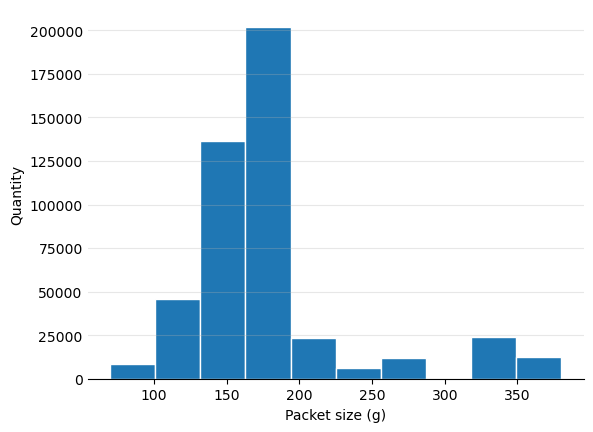

In [31]:
# Plot a histogram to visualise distribution of pack sizes. 
plt.hist(transaction['PACK_SIZE'], weights=transaction['PROD_QTY'], edgecolor='white')
plt.xlabel('Packet size (g)')
plt.ylabel('Quantity')
plt.gca().spines[['top','right','left']].set_visible(False)
plt.tick_params(axis='y', length=0)
plt.grid(axis='y', alpha=0.3) # linestyle='--'
# plt.grid(True);

In [32]:
#Brand name:use the first word in PROD_NAME to work out the brand name
transaction.insert(9, "BRAND_NAME",transaction['PROD_NAME'].str.split().str.get(0), True)
#transaction['BRAND_NAME'] = transaction['PROD_NAME'].str.split().str[0]
transaction['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [33]:
# Grain and GrnWves are both Grain Waves chips.
transaction[transaction['PROD_NAME'].str.contains('Grain')]['PROD_NAME'].str.split().str[:2].value_counts()

PROD_NAME
[Grain, Waves]    6272
Name: count, dtype: int64

In [34]:
# NCC and Natural are both Natural Chip Co.
transaction[transaction['PROD_NAME'].str.contains('NCC|Natural')]['PROD_NAME'].str.split().str[:4].value_counts()

PROD_NAME
[Natural, Chip, Co, Tmato]              1572
[Natural, ChipCo, Sea, Salt]            1550
[Natural, Chip, Compny, SeaSalt175g]    1468
[Natural, ChipCo, Hony, Soy]            1460
[NCC, Sour, Cream, &]                   1419
Name: count, dtype: int64

In [35]:
# Red and RRD are both Red Rock Deli chips. So do Smiths and Smith, Dorito and Doritos, and... Let's combine these together.
transaction['BRAND_NAME'].replace({'Red':'Red Rock Deli', 'RRD':'Red Rock Deli', 'Smith':'Smiths','Dorito':'Doritos','Snbts':'Sunbites','Infzns':'Infuzions','WW':'Woolworths',
                                  'Grain':'Grain Waves', 'GrnWves':'Grain Waves','Natural':'Natural Chip Co', 'NCC':'Natural Chip Co'}, inplace=True)

In [36]:
transaction['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle             41288
Smiths             30353
Doritos            25224
Pringles           25102
Red Rock Deli      16321
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: count, dtype: int64

### Examining customer data

In [37]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [38]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [39]:
customer['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [40]:
customer['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

**There are no nulls or inconsistencies in any of the columns.**

### Merge transaction data to customer data

In [41]:
merged_data = pd.merge(transaction, customer, on='LYLTY_CARD_NBR', how='left')

In [42]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   BRAND_NAME        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 22.6+ MB


**As the number of rows in `merged` is the same as that of `transaction`, we can be sure that no duplicates were created.** 

**Let's also check if some customers were not matched on by checking for nulls.**

In [43]:
merged_data['LIFESTAGE'].isnull().sum() #See if any transactions did not have a matched customer.

0

**Code to save dataset as a csv**

In [44]:
merged_data.to_csv("merged_data.csv", index=False)

**Data exploration is now complete.**

## Data analysis on customer segments 

In [45]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [46]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
grouped_sales = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False)['TOT_SALES'].sum().sort_values(by='TOT_SALES', ascending=False)
grouped_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


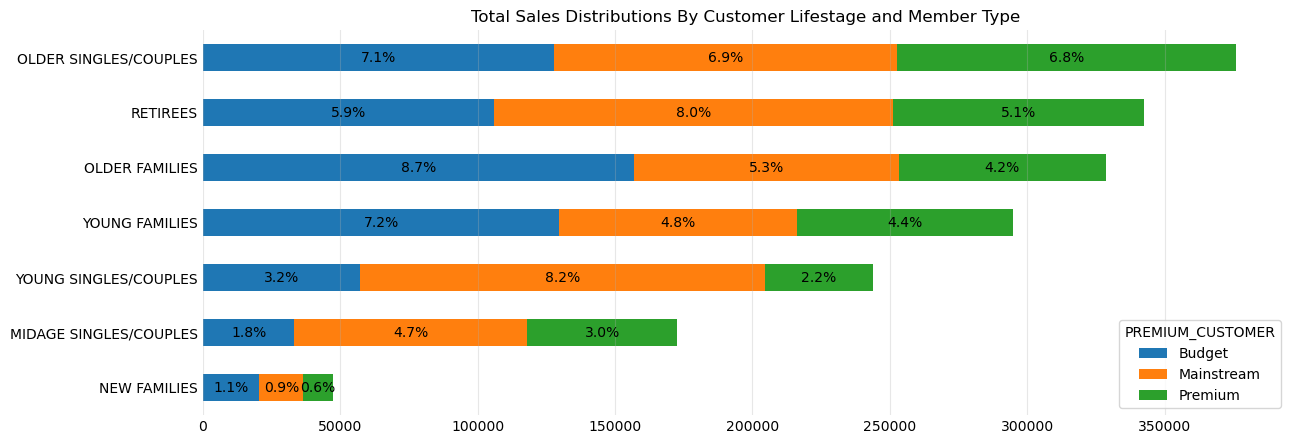

In [47]:
# Get the total sales 
total_sales = merged_data['TOT_SALES'].sum()

# Plot a breakdown of the total sales by lifestage and PREMIUM_CUSTOMER
total_sales_breakdown = (merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES']
                         .agg('sum')
                         .unstack('PREMIUM_CUSTOMER')
                         .fillna(0))
total_sales_breakdown = total_sales_breakdown.loc[total_sales_breakdown.sum(axis=1).sort_values().index]

ax = total_sales_breakdown.plot(kind='barh', stacked=True, figsize=(14, 5))

# Add percentages of the summed total sales as labels 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{label:.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
   
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        
ax.set_xlabel("")
ax.set_ylabel("")
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.grid(axis='x', alpha=0.3)
ax.set_title('Total Sales Distributions By Customer Lifestage and Member Type')
plt.show()

**Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees**

**Let's see if the higher sales are due to there being more customers who buy chips.**

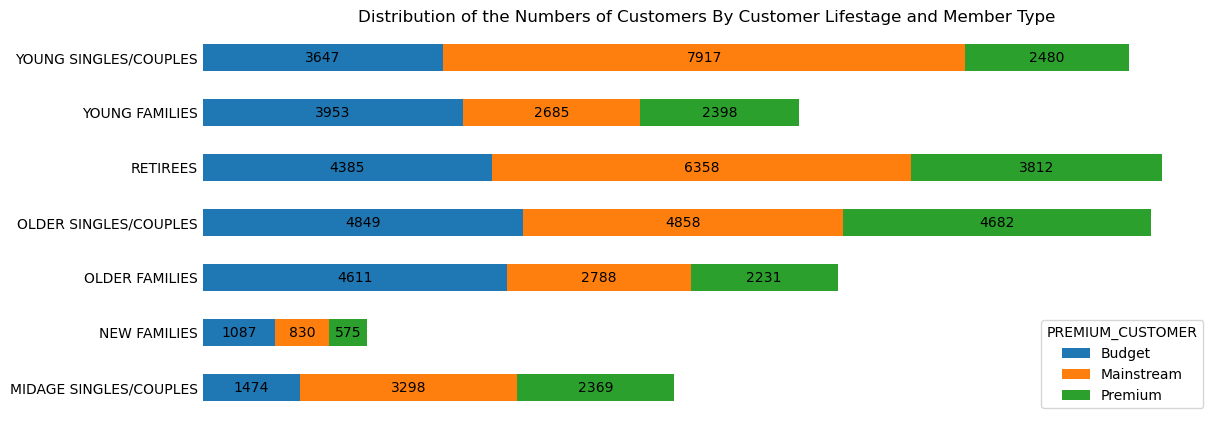

In [48]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
grouped_customer_count= merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].agg('nunique').unstack('PREMIUM_CUSTOMER').fillna(0)
#colors = plt.get_cmap('Set1').colors
ax = grouped_customer_count.plot(kind='barh', stacked=True, figsize=(13, 5)) #, color=colors)

# Add customer numbers as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.0f}'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        
ax.set_xlabel("")
ax.set_ylabel("")
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0)
plt.tick_params(axis='x', labelbottom=False) 
ax.set_title('Distribution of the Numbers of Customers By Customer Lifestage and Member Type')
plt.show()

**There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.**

**Higher sales may also be driven by more units of chips being bought per customer.**

In [49]:
grouped_qty = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])\
['LYLTY_CARD_NBR'].nunique()
grouped_qty

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.026459
                        Mainstream          6.432080
                        Premium             6.078514
NEW FAMILIES            Budget              4.821527
                        Mainstream          4.891566
                        Premium             4.815652
OLDER FAMILIES          Budget              9.076773
                        Mainstream          9.255380
                        Premium             9.071717
OLDER SINGLES/COUPLES   Budget              6.781398
                        Mainstream          6.712021
                        Premium             6.769543
RETIREES                Budget              6.141847
                        Mainstream          5.925920
                        Premium             6.103358
YOUNG FAMILIES          Budget              8.722995
                        Mainstream          8.638361
                        Premium             8.716013
YOUNG

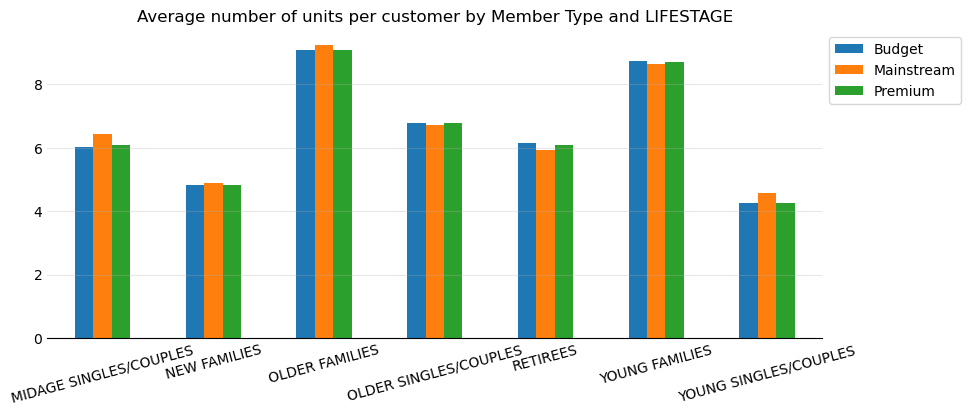

In [50]:
ax = grouped_qty.unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(10, 4))
ax.set_title('Average number of units per customer by Member Type and LIFESTAGE')
plt.xticks(rotation=15)
ax.set_xlabel("")
ax.set_ylabel("")
plt.gca().spines[['top','right','left']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.grid(axis='y',alpha=0.3)
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.show()

**Older families and young families in general buy more chips per customer.**

**Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.**

In [51]:
# Create a column for the unit price of chips purchased per transaction 
merged_data['UNIT_PRICE'] = merged_data['TOT_SALES']/merged_data['PROD_QTY']
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().unstack('PREMIUM_CUSTOMER').fillna(0)
avg_price_per_unit

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.743328,3.994241,3.770698
NEW FAMILIES,3.917688,3.916133,3.872110
OLDER FAMILIES,3.745340,3.737077,3.717000
OLDER SINGLES/COUPLES,3.882096,3.814665,3.893182
RETIREES,3.924404,3.844294,3.920942
YOUNG FAMILIES,3.760737,3.724533,3.762150
YOUNG SINGLES/COUPLES,3.657366,4.065642,3.665414


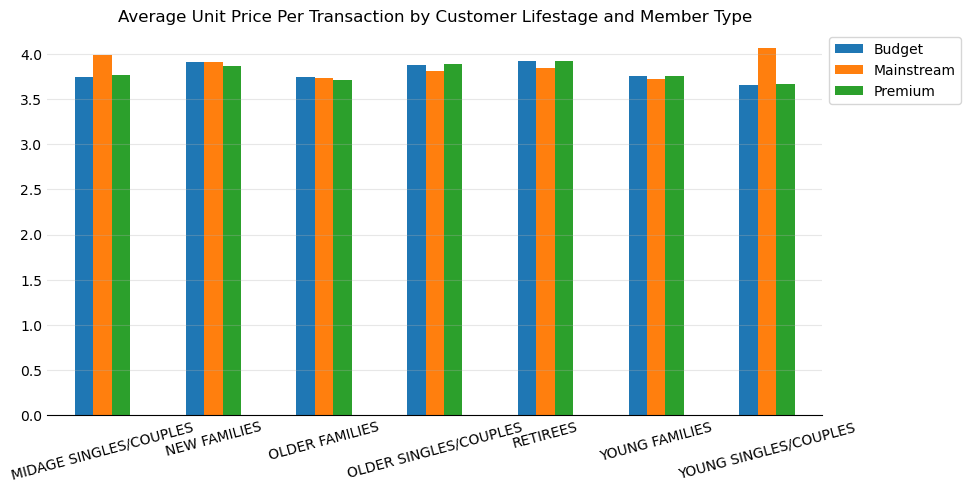

In [52]:
ax = avg_price_per_unit.plot.bar(stacked=False, figsize=(10, 5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Member Type')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=15)
ax.set_xlabel("")
ax.set_ylabel("")
plt.gca().spines[['top','right','left']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.grid(axis='y',alpha=0.3)
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.show()

**Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.
This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.**

**As the difference in average price per unit isn't large, we can check if this difference is statistically different.**

### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

In [53]:
# Perform a t-test to see if the difference is significant
from scipy.stats import ttest_ind

# Identify the groups to test the hypthesis with 
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = merged_data["PREMIUM_CUSTOMER"] != "Mainstream"

group_a = merged_data[mainstream & young_midage]["UNIT_PRICE"]
group_b = merged_data[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test 
t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)

print(t_stat, p_value)

37.6243885962295 6.967354233018139e-306


The t-test results in a p-value of 6.97e-306, being close to 0, i.e. the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

### Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.

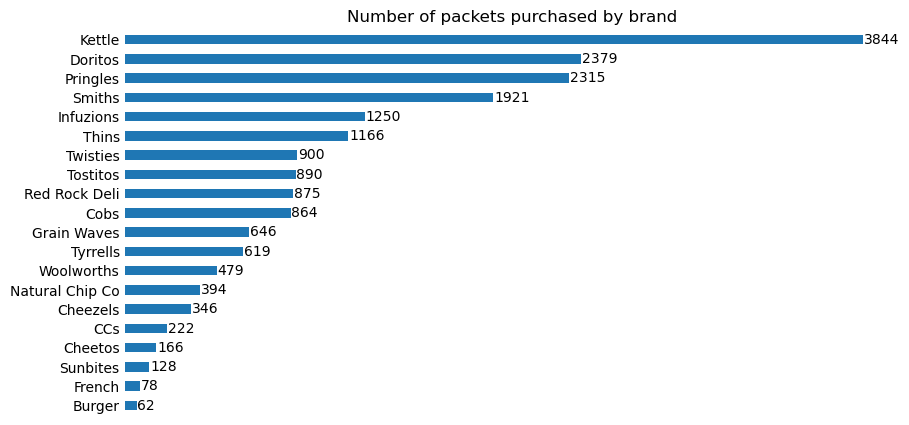

In [54]:
# Create a visualization of what brands young singles/couples purchased the most
young_mainstream = merged_data.query('PREMIUM_CUSTOMER=="Mainstream" and LIFESTAGE=="YOUNG SINGLES/COUPLES"')
young_mainstream_brand = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True)
ax = young_mainstream_brand.plot.barh(figsize=(10, 5))

for index, value in enumerate(young_mainstream_brand):
    ax.text(value+5, index, f'{value}', va='center')
    
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title('Number of packets purchased by brand')
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.tick_params(axis='x', labelbottom=False) 
plt.show()

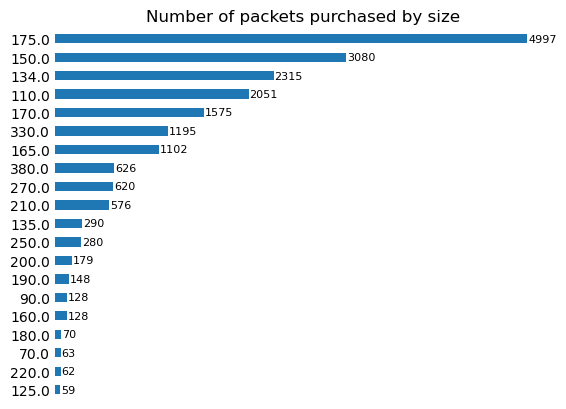

In [55]:
# Let's also find out if our target segment tends to buy larger packs of chips.
young_mainstream_packsize = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True)
ax=young_mainstream_packsize.plot.barh()

for index, value in enumerate(young_mainstream_packsize):
    ax.text(value+10, index, f'{value}', va='center', fontsize=8)
    
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title('Number of packets purchased by size')
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.tick_params(axis='x', labelbottom=False) 
plt.show()

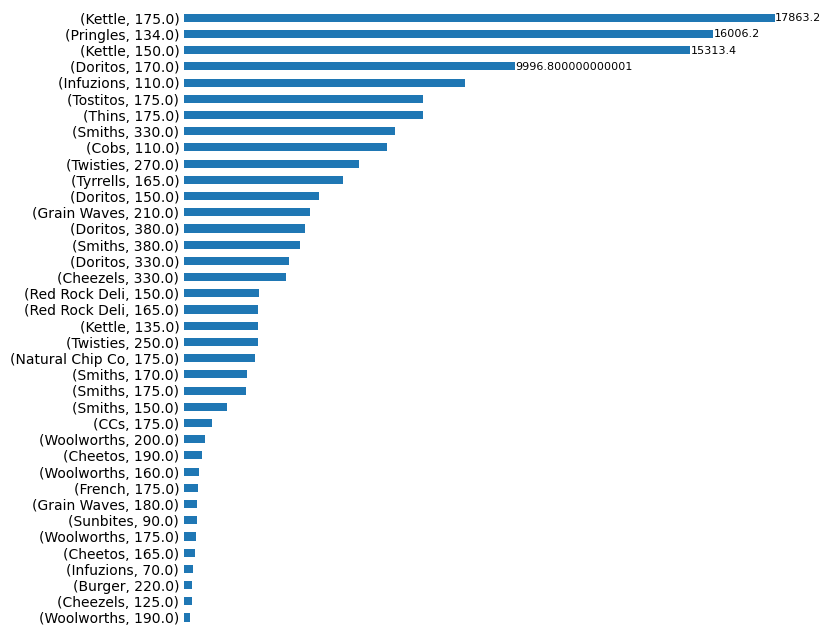

In [56]:
# brands correspond to size
young_mainstream_brand_size = young_mainstream.groupby(['BRAND_NAME','PACK_SIZE'])['TOT_SALES'].sum().sort_values()
ax = young_mainstream_brand_size.plot.barh(figsize=(8,8))

for index, value in enumerate(young_mainstream_brand_size):
    if index >young_mainstream_brand_size.size-5:
        ax.text(value+20, index, f'{value}', va='center', fontsize=8)
        
ax.set_ylabel("")
ax.set_xlabel("")
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0) 
plt.tick_params(axis='x', labelbottom=False) 
plt.show()

### Summary of Insights

The following three segments contribute the most to the total sales:  
Older families - Budget  
Young singles/couples - Mainstream  
Retirees - Mainstream  
Within them, the largest population group is mainstream young singles/couples, followed by mainstream retirees. While population is not a driving factor for budget older families, older families and young families buy more chips per customer compared to other segments.  

Furthermore, mainstream young singles/couples are the most willing to pay more per packet of chips compared to other segments. Upon closer examination, we found that their most popular chip brands are Kettle, Doritos, and Pringles. They prefer to buy 175g Kettle, 134g Pringles, 150g Kettle, and 170g Doritos.